author:leezeeyee   
date:2021/5/12

In [175]:
import numpy as np
from utils import timer
import matplotlib.pyplot as plt

## Gram-Schmidt process

In [9]:
def proj(U,V):
    '''
    computer the projection of vector $V$ on the direction of $U$ 
    U and V should be same dimension
    '''
    if U.shape != V.shape:
        raise Exception('not in same dimension')
    return np.dot(U,V)*U/np.dot(U,U)

In [11]:
proj(np.array([3,4]),np.array([3,2]))

array([2.04, 2.72])

In [260]:
@timer
def gram_schmidt_c(A):
    U=np.copy(A)
    for col in range(A.shape[1]):
        #print(A[:,col]) 
        for i in range(col):
            # now the u is already normalized
            U[:,col]-=np.dot(U[:,i],A[:,col])*U[:,i]#proj(U[:,i],A[:,col]) 
        U[:,col]/=np.sqrt(np.dot(U[:,col],U[:,col]))
    return U
            


In [272]:
@timer
def gram_schmidt_r(A):
    A=A.transpose()
    U=np.copy(A)
    for col in range(A.shape[0]):
        #print(A[:,col]) 
        for i in range(col):
            # now the u is already normalized
            U[col]-=np.dot(U[i],A[col])*U[i]#proj(U[:,i],A[:,col]) 
        U[col]/=np.sqrt(np.dot(U[col],U[col]))
    return U.transpose()

In [276]:
@timer
def gram_schmidt_o(A):
    if A.shape[0]>A.shape[1]:
        return gram_schmidt_c.__wrapped__(A)
    else:
        return gram_schmidt_r.__wrapped__(A)

In [280]:
A=np.random.rand(5,3)
res=gram_schmidt_o.__wrapped__(A)
print(res)
res=gram_schmidt.__wrapped__(A)
print(res)

[[ 0.2258366   0.63753731 -0.28336434]
 [ 0.35925639  0.25433128  0.80147952]
 [ 0.1531241   0.59419758 -0.02982156]
 [ 0.60449844 -0.09675403 -0.5084243 ]
 [ 0.65655718 -0.40795792  0.13397994]]
[[ 0.2258366   0.63753731 -0.28336434]
 [ 0.35925639  0.25433128  0.80147952]
 [ 0.1531241   0.59419758 -0.02982156]
 [ 0.60449844 -0.09675403 -0.5084243 ]
 [ 0.65655718 -0.40795792  0.13397994]]


In [278]:
res

array([[ 0.61307582,  0.04686647, -0.56011655],
       [ 0.32675311,  0.51866766,  0.06673522],
       [ 0.05428254,  0.40300989,  0.68454075],
       [ 0.50898988,  0.26638768,  0.11476351],
       [ 0.5053248 , -0.70385227,  0.44726856]])

In [ ]:
gram_schmidt_o.__wrapped__(np.random.rand(5,3))

In [53]:
for col in range(res.shape[1]):
    print(np.dot(res[:,col],res[:,2]))

-4.0245584642661925e-16
4.163336342344337e-16
1.0


## QR decomposition

In [210]:
@timer
def gram_schmidt_jjgo(vectors):
    basis = []
    for v in vectors:
        w = v - sum (np.dot(v,b)*b  for b in basis )
        #( np.fromiter( (np.dot(v,b)*b  for b in basis ),float ))
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)

In [319]:
test = np.random.rand(98,59)

res,time=(gram_schmidt(test))
print(time)
res,time=(gram_schmidt_o(test))
print(time)
res,time=(gram_schmidt_jjgo(test))
print(time)

0:00:00.033946
0:00:00.034910
0:00:00.040886


In [269]:
mode=2
#(0:matrix 1:fixed row 2:fixed col)
fixed_size=50
label_dict={0:'matrix', 1:'fixed row', 2:'fixed col'}

In [270]:
t1s=[]
t2s=[]
t3s=[]
t4s=[]
ranges=range(10,200,20)
for d in ranges:
    # print('~~~~~~~~~~~~d='+str(d)+'~~~~~~~~~~~')
    #d=400
    if mode is 0:
        A=np.random.rand(d,d)
    elif mode is 1:
        A=np.random.rand(fixed_size,d)
    elif mode is 2:
        A=np.random.rand(d,fixed_size)
    # for i in range(3):
    res,t1=(gram_schmidt_c(A))
    res,t2=(gram_schmidt_r(A))
    res,t3=(gram_schmidt_jjgo(A))
    t1s.append(t1.total_seconds())
    t2s.append(t2.total_seconds())
    t3s.append(t3.total_seconds())

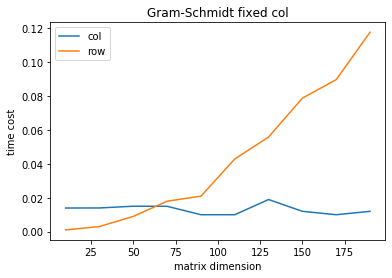

In [271]:
plt.plot(ranges,t1s,label='col')
plt.plot(ranges,t2s,label='row')
# plt.plot(ranges,t3s,label='others')
plt.legend()
plt.xlabel('matrix dimension')
plt.ylabel('time cost')
plt.title('Gram-Schmidt '+label_dict[mode])
plt.show()

In [324]:
mode=0
#(0:matrix 1:fixed row 2:fixed col)
fixed_size=50
label_dict={0:'matrix', 1:'fixed row', 2:'fixed col'}

In [327]:
t1s=[]
t2s=[]
t3s=[]
t4s=[]
ranges=range(10,500,20)
for d in ranges:
    # print('~~~~~~~~~~~~d='+str(d)+'~~~~~~~~~~~')
    #d=400
    if mode is 0:
        A=np.random.rand(d,d)
    elif mode is 1:
        A=np.random.rand(fixed_size,d)
    elif mode is 2:
        A=np.random.rand(d,fixed_size)
    # for i in range(3):
    res,t1=(gram_schmidt_c(A))
    res,t2=(gram_schmidt_r(A))
    res,t3=(gram_schmidt_o(A))
    t1s.append(t1.total_seconds())
    t2s.append(t2.total_seconds())
    t3s.append(t3.total_seconds())

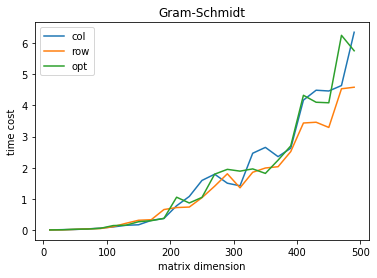

In [328]:
plt.plot(ranges,t1s,label='col')
plt.plot(ranges,t2s,label='row')
plt.plot(ranges,t3s,label='opt')
plt.legend()
plt.xlabel('matrix dimension')
plt.ylabel('time cost')
plt.title('Gram-Schmidt')
plt.show()

In [315]:

test = np.random.rand(3,4)
# test = np.array([[3.0, 1.0], [2.0, 2.0]])
# print(np.array(gs(test)))
print(gram_schmidt_c.__wrapped__(test))
print(gram_schmidt_o.__wrapped__(test))
# print(gram_schmidt_jjgo.__wrapped__(test.transpose()).transpose())

[[ 0.48866041 -0.87115732 -0.04791586  0.12101886]
 [ 0.53254341  0.25431779  0.80729175  0.70125523]
 [ 0.69109226  0.42000879 -0.58820413 -0.70256354]]
[[ 0.48866041 -0.87115732 -0.04791586  0.12101886]
 [ 0.53254341  0.25431779  0.80729175  0.70125523]
 [ 0.69109226  0.42000879 -0.58820413 -0.70256354]]


In [226]:
A=np.random.rand(3,3)
Q=gram_schmidt_o.__wrapped__(A)
R=np.zeros([A.shape[1],A.shape[1]])
R_o=np.zeros([A.shape[1],A.shape[1]])
R_o=np.dot(Q.transpose(),A)
for j in range(A.shape[1]):
    for i in range(j+1):
        R[i][j]=np.dot(Q[:,i],A[:,j])
print(np.allclose(np.triu(R_o),R))


True


In [227]:
np.allclose(np.dot(Q,R),A)

False

In [284]:
@timer
def QR(A,gram_o=True):
    if gram_o:
        Q=gram_schmidt_o.__wrapped__(A)
    else:
        Q=gram_schmidt.__wrapped__(A)
    R=np.zeros([A.shape[1],A.shape[1]])
    for j in range(A.shape[1]):
        for i in range(j+1):
            R[i][j]=np.dot(Q[:,i],A[:,j])
    return Q,R

In [285]:
@timer
def QR_o(A,gram_o=True):
    if gram_o:
        Q=gram_schmidt_o.__wrapped__(A)
    else:
        Q=gram_schmidt.__wrapped__(A)
    Q=gram_schmidt.__wrapped__(A)
    R=np.triu(np.dot(Q.transpose(),A))
    return Q,R

In [286]:
@timer
def inner(A):
    Q,R=np.linalg.qr(A)
    return Q,R

## time cost

In [287]:
A=np.random.rand(100,49)

In [288]:
res,time=QR(A)
Q,R=res
print(time)
res,time=QR_o(A)
Q,R=res
print(time)

0:00:00.029913
0:00:00.028921


In [289]:
res,time=inner(A)
print(time)


0:00:00.002016


In [320]:
t1s=[]
t2s=[]
t3s=[]
t4s=[]
ranges=range(10,900,20)
for d in ranges:
    # print('~~~~~~~~~~~~d='+str(d)+'~~~~~~~~~~~')
    #d=400
    A=np.random.rand(d,10)
    # for i in range(3):
    res,t1=QR_o(A)
    res,t2=QR_o(A,gram_o=False)
    res,t3=inner(A)
    t1s.append(t1.total_seconds())
    t2s.append(t2.total_seconds())
    t3s.append(t3.total_seconds())

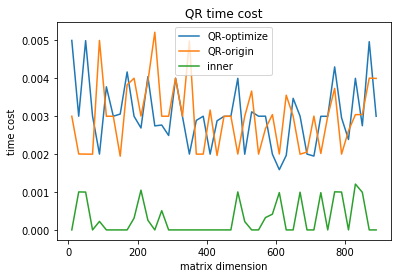

In [321]:
plt.plot(ranges,t1s,label='QR-optimize')
plt.plot(ranges,t2s,label='QR-origin')
plt.plot(ranges,t3s,label='inner')
plt.legend()
plt.xlabel('matrix dimension')
plt.ylabel('time cost')
plt.title('QR time cost')
plt.show()

## QR algorithm

In [147]:
def QR_eig(A):
    for i in range(1000):
        Q,R=QR.__wrapped__(A)
        A=np.dot(np.dot(Q.transpose(),A),Q)
    return A
    

In [152]:
d=3
A=np.random.rand(d,d)*10

In [153]:
A

array([[2.85556872, 2.24048991, 9.43285451],
       [8.40434956, 1.59401674, 5.50906956],
       [1.38480032, 0.57937951, 7.06994132]])

In [154]:
print(np.allclose(np.sort(np.linalg.eigvals(A)),np.sort(np.diag(QR_eig(A)))))

True


In [104]:
Q

matrix([[-1.,  0.],
        [-0.,  1.]])

In [106]:
Q.transpose()

matrix([[-1., -0.],
        [ 0.,  1.]])

In [107]:
np.dot(Q.transpose(),A)

matrix([[-4.0e+000,  1.0e+000],
        [-1.5e-323, -1.0e+000]])

In [108]:
np.dot(np.dot(Q.transpose(),A),Q)

matrix([[ 4.0e+000,  1.0e+000],
        [ 1.5e-323, -1.0e+000]])